# Neuroimaging data manipulation

Adapted from https://carpentries-incubator.github.io/SDC-BIDS-IntroMRI/ and https://github.com/miykael/workshop_pybrain

The primary goal of this section is to develop a conceptual understanding of the data structures involved, to facilitate diagnosing problems in data or analysis pipelines.

We'll be exploring two libraries: [nibabel](http://nipy.org/nibabel/) and [nilearn](https://nilearn.github.io/). Each of these projects has excellent documentation. While this should get you started, it is well worth your time to look through these sites.


## NiBabel
<img align="right" src="https://nipy.org/nibabel/_static/nibabel-logo.svg" width="16%">

**NiBabel** is a low-level Python library that gives access to a variety of imaging formats, with a particular focus on providing a common interface to the various **volumetric** formats produced by scanners and used in common neuroimaging toolkits.

 - NIfTI-1
 - NIfTI-2
 - SPM Analyze
 - FreeSurfer .mgh/.mgz files
 - Philips PAR/REC
 - Siemens ECAT
 - DICOM (limited support)

It also supports **surface** file formats

 - GIFTI
 - FreeSurfer surfaces, labels and annotations

**Connectivity**

 - CIFTI-2

**Tractography**

 - TrackViz .trk files

And a number of related formats.

**Note:** Almost all of these can be loaded through the `nibabel.load` interface.

## Nilearn
<img align="right" src="https://nilearn.github.io/stable/_static/nilearn-transparent.png" width="16%">

**Nilearn** labels itself as: *A Python module for fast and easy statistical learning on NeuroImaging data. It leverages the scikit-learn Python toolbox for multivariate statistics with applications such as predictive modeling, classification, decoding, or connectivity analysis.*

But it's much more than that. It is also an excellent library to **manipulate** (e.g. resample images, smooth images, region-of-interest extraction, etc.) and **visualize** your neuroimages.

## Setup

In [33]:
import nibabel as nib
from nilearn import plotting
from nilearn import image as nli

import pylab as plt
import numpy as np
## Set numpy to print 3 decimal points and suppress small values
np.set_printoptions(precision=3, suppress=True)

## Loading and inspecting images in `nibabel`

First, we will use the `load()` function to create a `NiBabel` image object from a NIfTI file. 

We’ll load in an example `T1w` and `BOLD` images that we will retrieve from our `BIDS` dataset.


In [34]:
from bids.layout import BIDSLayout

ds_path = '../data/fmri_data/bids/'

# Initialize the BIDS layout
layout = BIDSLayout(ds_path)

# Get subject's T1w image and all Bold images
t1_file = layout.get(subject='04', extension='nii.gz', datatype='anat', return_type='filename')
bold_files = layout.get(subject='04', extension='nii.gz', suffix='bold', return_type='filename')

# Load the T1 image and the 1st Bold image
t1_img = nib.load(t1_file[0])
bold_img = nib.load(bold_files[0])

# Print the shape of both images
print(f"The shape of the T1 image: {t1_img.shape}")
print(f"The shape of the Bold image: {bold_img.shape}")

The shape of the T1 image: (192, 256, 256)
The shape of the Bold image: (64, 64, 33, 208)


Loading in a NIfTI file with `NiBabel` gives us a special type of data object which encodes all the information in the file. Each bit of information is called an attribute in Python’s terminology. To see all of these attributes, type `t1_img.` followed by pressing `Tab`. There are three main attributes that we’ll discuss today:
* `Header`
* `Data`
* `Affine`

### Header
`Header` contains metadata about the image, such as image dimensions, data type, etc.

In [35]:
t1_hdr = t1_img.header
print(t1_hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 192 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.   1.   1.   1.   2.25 0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=3;Time=165059.315;phase=1'
aux_file        : b'V'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -91.432205
qoffset_y       : -108.694916
qoffset_z       

`t1_hdr` is a Python **dictionary**. Dictionaries are containers that hold pairs of objects - **keys** and **values**. 
We can access the value stored by a given key by typing: `t1_hdr['<key_name>']`.

In [36]:
t1_hdr['magic']

array(b'n+1', dtype='|S4')

**==================================================================================================**

**EXCERCISE**

Extract `pixdim` value from the `BOLD image` header.

In [ ]:
# write your code here


**==================================================================================================**

### Data
As you’ve seen above, the header contains useful information that gives us information about the properties (metadata) associated with the MR data we have loaded in. Now we’ll move in to loading the actual image data itself. We can achieve this by using the method called `get_fdata()`.

In [37]:
# Get the T1 and Bold image data
t1_data = t1_img.get_fdata()
bold_data = bold_img.get_fdata()

# How does the T1 data look like
print(t1_data)

[[[0.    0.    0.    ... 0.    0.    0.   ]
  [0.    0.    0.    ... 2.008 0.    0.   ]
  [0.    0.    0.    ... 2.008 0.    0.   ]
  ...
  [0.    0.    0.    ... 0.    0.    0.   ]
  [0.    0.    0.    ... 0.    0.    0.   ]
  [0.    0.    0.    ... 0.    0.    0.   ]]

 [[0.    0.    0.    ... 5.002 0.    0.   ]
  [0.    0.    0.    ... 2.008 0.    0.   ]
  [0.    0.    0.    ... 2.994 0.    0.   ]
  ...
  [0.    0.    0.    ... 0.    0.    0.   ]
  [0.    0.    0.    ... 0.    0.    0.   ]
  [0.    0.    0.    ... 0.    0.    0.   ]]

 [[0.    0.    0.    ... 2.008 0.    0.   ]
  [0.    0.    0.    ... 2.994 0.    0.   ]
  [0.    0.    0.    ... 1.004 0.    0.   ]
  ...
  [0.    0.    0.    ... 0.    0.    0.   ]
  [0.    0.    0.    ... 0.    0.    0.   ]
  [0.    0.    0.    ... 0.    0.    0.   ]]

 ...

 [[0.    0.    0.    ... 0.    0.    0.   ]
  [0.    0.    0.    ... 0.    0.    0.   ]
  [0.    0.    0.    ... 0.    0.    0.   ]
  ...
  [0.    0.    0.    ... 0.    0.    0. 

The data is a **multidimensional array** representing the image data.

How can we see the number of dimensions in the `t1_data` array? Once again, all of the attributes of the array can be seen by typing `t1_data.` followed by `Tab`.

In [38]:
# T1 number of dimensions
print(f"T1w image dimensions: {t1_data.ndim}")

T1w image dimensions: 3


**==================================================================================================**

**EXCERCISE**

What's the imensions of our BOLD image?

In [ ]:
# write your code here


**==================================================================================================**

In [40]:
# How big each dimension is
print(f"T1w image shape is {t1_data.shape}")
print(f"BOLD image shape is {bold_data.shape}")

T1w image shape is (192, 256, 256)
BOLD image shape is (64, 64, 33, 208)


The first 3 numbers given here represent the number of values along a respective dimension *(x,y,z)*. For the `BOLD` image this brain was scanned in `33` axial slices with a resolution of `64 x 64` voxels per slice. That means there are:

`64 * 64 * 33 = 135,168` voxels in total! And the BOLD signal was sampled `208` times. 

Let’s see the type of data inside of the array.

In [41]:
t1_data.dtype

dtype('float64')

This tells us that each element in the array (or voxel) is a floating-point number.
The data type of an image controls the range of possible intensities. As the number of possible values increases, the amount of space the image takes up in memory also increases. 

Let's see what the range of these images are. 

In [42]:
import numpy as np
print(f"T1w image range is {str(np.min(t1_data))} to {str(np.max(t1_data))}")
print(f"BOLD image range is {str(np.min(bold_data))} to {str(np.max(bold_data))}")

T1w image range is 0.0 to 1175.0000149849802
BOLD image range is 0.0 to 1907.0



How do we examine **what value a particular voxel is**? We can inspect the value of a voxel by selecting an index as follows:

`data[x,y,z]`

So for example we can inspect a voxel at coordinates `(20,60,50)` by doing the following:

In [43]:
# A value of a T1 image voxel at coordinates (20,60,50)
t1_data[19, 59, 49]

6.006332570686936

**NOTE**: Python uses **zero-based indexing**. The first item in the array is item `0`. The second item is item `1`, the third is item `2`, etc.

We can also extract data from a **slice** for visualisation and analysis. 
**Slicing** does exactly what it seems to imply. Giving our 3D volume, we pull out a 2D slice of our data. Below is an example of slicing from left to right (sagittal slicing, along the `x-axis`). We look at the '20th' slice.

In [44]:
# Values of the T1 image's 20th sagittal slice
x_slice = t1_data[19, :, :]
print(x_slice)

[[0.    0.    0.    ... 2.008 0.    0.   ]
 [0.    0.    0.    ... 1.004 0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]


This is similar to the indexing we did before to pull out a single voxel. However, instead of providing a value for each axis, the `:` indicates that we want to grab all values from that particular axis.

In [45]:
z_slice = t1_data[:, :, 2]
print(z_slice)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


We’ve been looking at voxel nummerical values, but we have no idea what the images actually look like! Let's look how the `100` slice of each of the `3` dimensions of T1 image look. 

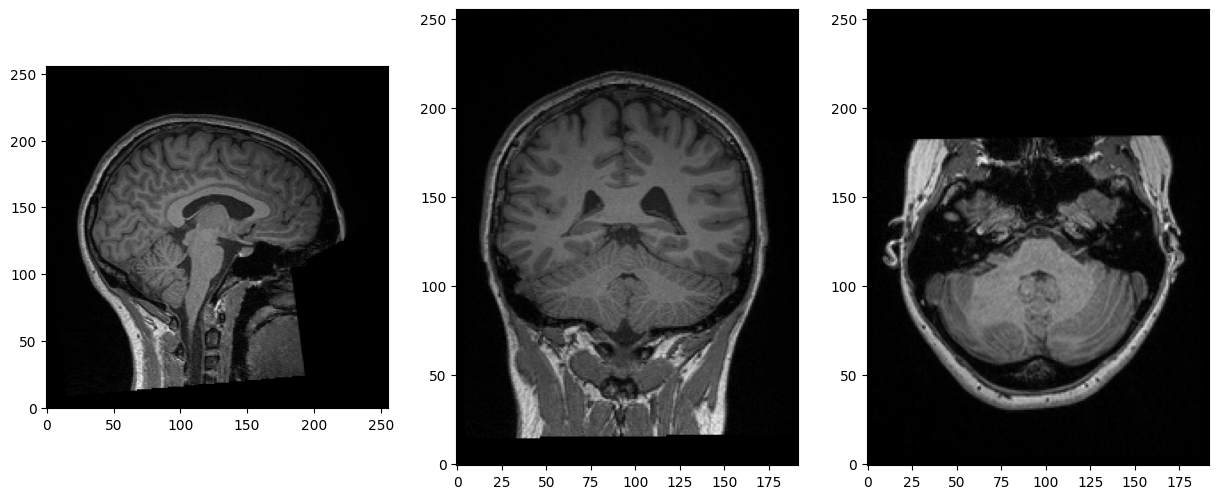

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

slices = [t1_data[99, :, :], t1_data[:, 99, :], t1_data[:, :, 99]]

fig, axes = plt.subplots(1, len(slices), figsize=(15,15))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")


`Nibabel` has its own viewer, which can be accessed through `img.orthoview()`.

**Sidenote to plotting with orthoview()**

As with other figures, if you initiated `matplotlib` with `%matplotlib inline`, the output figure will be static. If you use `orthoview()` in a normal IPython console, it will create an interactive window, and you can click to select different slices, similar to `mricron`. To get a similar experience in a `jupyter notebook`, use `%matplotlib notebook`. **But don't forget to close figures afterward again or use` %matplotlib inline` again, otherwise, you cannot plot any other figures.**

<IPython.core.display.Javascript object>


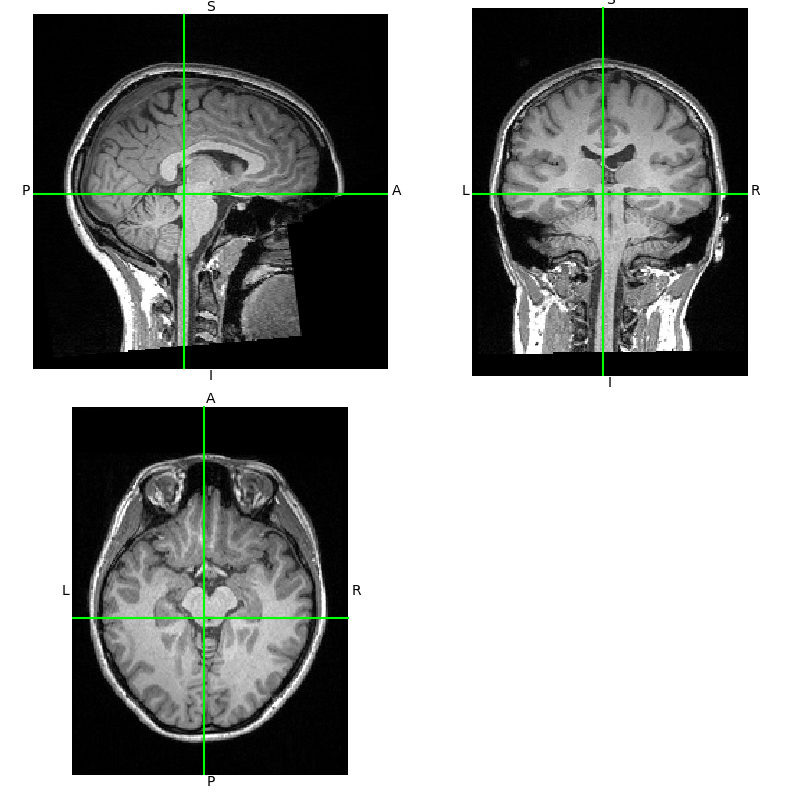

<OrthoSlicer3D: /imaging/correia/da05/workshops/2023-09-COGNESTIC/cognestic23_notebooks/03_fMRI/../data/fmri_data/bids/sub-04/anat/sub-04_acq-mprage_T1w.nii.gz (192, 256, 256)>

In [47]:
%matplotlib notebook
t1_img.orthoview()

### Affine
The final important piece of metadata associated with an image file is the **affine matrix**. `Affine` tells the position of the image array data in a reference space. 

The voxel coordinate tells us almost nothing about where the data came from in terms of position in the scanner.  For example, let’s say we have the voxel coordinate (26, 30, 16). Without more information we have no idea whether this voxel position is on the left or right of the brain, or came from the left or right of the scanner.

This is because the scanner allows us to collect voxel data in almost any arbitrary position and orientation within the magnet.

Usually BOLD images are acquired in a different angle and with a smaller area coverage than the T1w anatomical images - the bounding boxes are different. 

<img align="centre" src="https://nipy.org/nibabel/_images/localizer.png" width="70%">

The center of the BOLD image data is not quite at the center of magnet bore (the magnet *isocenter*).

We have an anatomical and an BOLD scan, and later on we will surely want to be able to relate the data from subject's `_bold.nii.gz` to the same subject's `_T1w.nii.gz`. We can’t easily do this at the moment, because we collected the anatomical image with a different field of view and orientation to the EPI image, so the voxel coordinates in the BOLD image refer to **different locations in the magnet** to the voxel coordinates in the anatomical image.

We solve this problem by keeping track of the relationship of voxel coordinates to some reference space - e.g, our magnet space. The **affine array** stores the relationship between voxel coordinates in the image data array and coordinates in the reference space. Because we know the relationship of voxel coordinates to the reference space for both images, we can use this information to relate voxel coordinates in subject's `_bold.nii.gz` to spatially equivalent voxel coordinates in the same subject's `_T1w.nii.gz`.

The origin of the axes is at the magnet isocenter. This is coordinate `(0, 0, 0)` in our reference space. All three axes pass through the isocenter. The units of the scanner reference space are **mm**. If the subject is lying in the usual position for a brain scan, face up and head first in the scanner, then 
* scanner-left/right is also the left-**right** axis of the subject’s head, 
* scanner-floor/ceiling is the posterior-**anterior** axis of the head and 
* scanner-bore is the inferior-**superior** axis of the head.

This is the most common subject-centered scanner coordinate system in neuroimaging, called **scanner RAS+** (right, anterior, superior). The **+** sign means that Right, Anterior, Superior are all positive values on these axes (and left, posterior, inferior are negative). **NOTE**: **right** means the subject’s **right**.

<img align="left" src="https://people.cas.sc.edu/rorden/anatomy/tspace.gif" width="30%">

<img align="right" src="https://www.slicer.org/w/img_auth.php/2/22/Coordinate_sytems.png" width="70%">

Below is the affine matrix for our anatomical `T1w` data. That is, relating the **voxel coordinates** to **world (scanner) coordinates** in **RAS+** space.


In [48]:
t1_affine = t1_img.affine
print(t1_affine)

[[   1.       0.       0.     -91.432]
 [   0.       1.       0.    -108.695]
 [   0.       0.       1.    -126.322]
 [   0.       0.       0.       1.   ]]


How 'shifted' is the T1 image's voxel space center from the reference space (scanner bore) center?

In [49]:
# nibabel has a function apply_affine 
from nibabel.affines import apply_affine 

# the central voxel in the voxel space
t1_vox_center = (np.array(t1_data.shape) - 1) / 2.
print(f"The central voxel in the voxel space is {t1_vox_center.astype(int)}")

# distance from the reference space centre (in mm)
# voxel space's central voxel's location in the reference space
apply_affine(t1_img.affine, t1_vox_center)

The central voxel in the voxel space is [ 95 127 127]


array([ 4.068, 18.805,  1.178])

That means the center of the T1 image field of view is 4.1 mm to the right from the isocenter of the magnet, 18.1 mm anterior to the isocenter and 1.2 mm above (superior) the isocenter.

The parameters in the affine array can therefore give the position of any voxel coordinate, relative to the scanner RAS+ reference space.

When we register an image to some template, e.g., **MNI template**, we will get an affine giving the relationship between voxels in the aligned image and the MNI RAS+ space. The origin `(0, 0, 0)` ot the MNI reference space is anterior commissure (AC). 

## Image manipulation with `nilearn`

### The mean image
If you use `nibabel` to compute the mean image, you first need to load the img, get the data and then compute the mean thereof. 

**With `nilearn`, you can do all this in just one line with `mean image`.**

In [50]:
mean_img = nli.mean_img(bold_img)

In [51]:
mean_data = mean_img.get_fdata()
mean_data.shape

(64, 64, 33)

From version `0.5.0` on, `nilearn` provides interactive visual views. A nice alternative to `nibabel`'s `orthoview()`:

/home/da05/.conda/envs/cognestic23/lib/python3.10/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



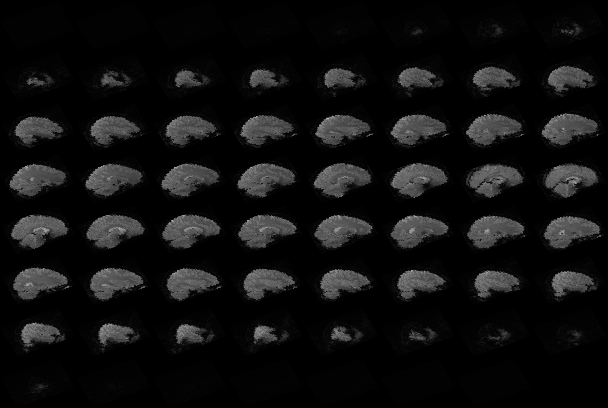
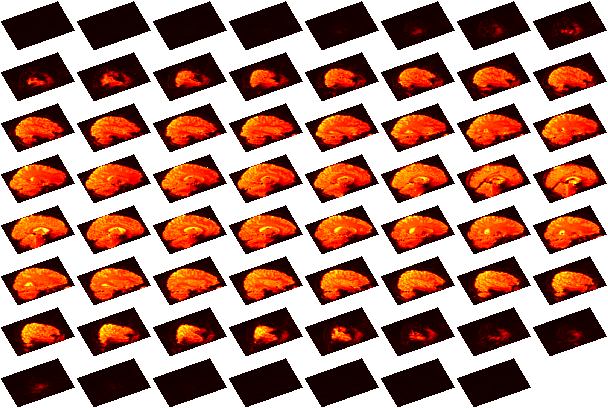

In [52]:
plotting.view_img(mean_img, bg_img=mean_img)

In [ ]:
#plotting.view_img?

### Resample image to a template
Using `resample_to_img`, we can resample one image to have the same dimensions as another one. For example, let's resample an anatomical `T1` image to the computed `mean` image above.

In [53]:
# image shapes before resampling
print([mean_img.shape, t1_img.shape])

[(64, 64, 33), (192, 256, 256)]


In [54]:
# resampling T1 to the mean Bold image
resampled_t1 = nli.resample_to_img(t1_img, mean_img)

# T1 image shape after resampling
resampled_t1.shape

(64, 64, 33)

How does the resampled `T1` image look like? Here we will use another `nilearn` plotting function that plots a static image. 

<IPython.core.display.Javascript object>


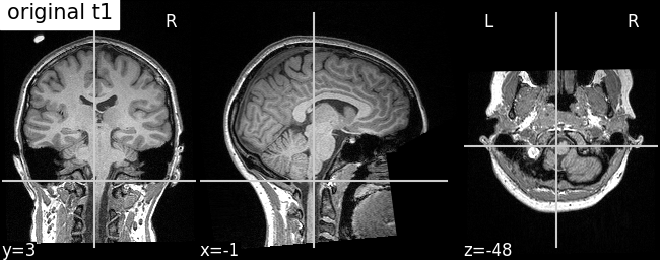

<IPython.core.display.Javascript object>


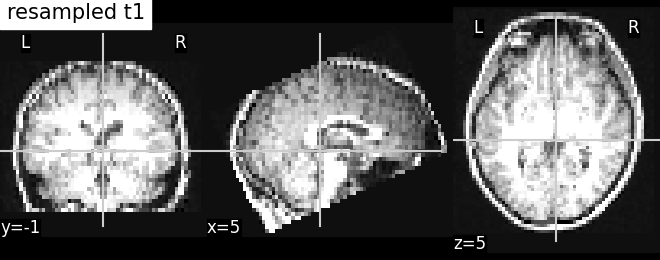

In [55]:
plotting.plot_anat(t1_img, title = 'original t1', dim=-1)
plotting.plot_anat(resampled_t1, title = 'resampled t1', dim=-1)

### Smooth an image
Using `smooth_img`, we can very quickly smooth any kind of MRI image. Let's, for example, take the mean image from above and smooth it with different FWHM values.

<IPython.core.display.Javascript object>


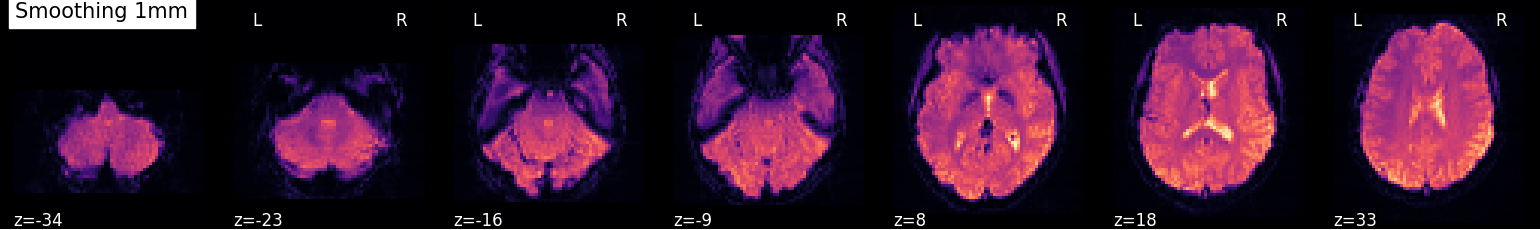

<IPython.core.display.Javascript object>


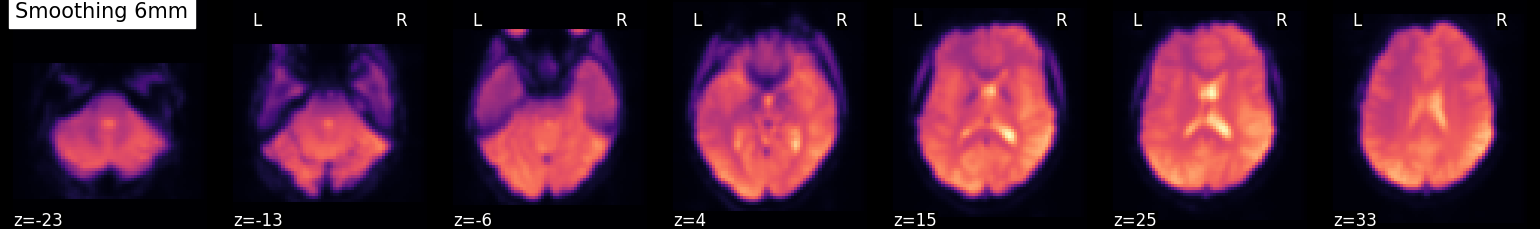

<IPython.core.display.Javascript object>


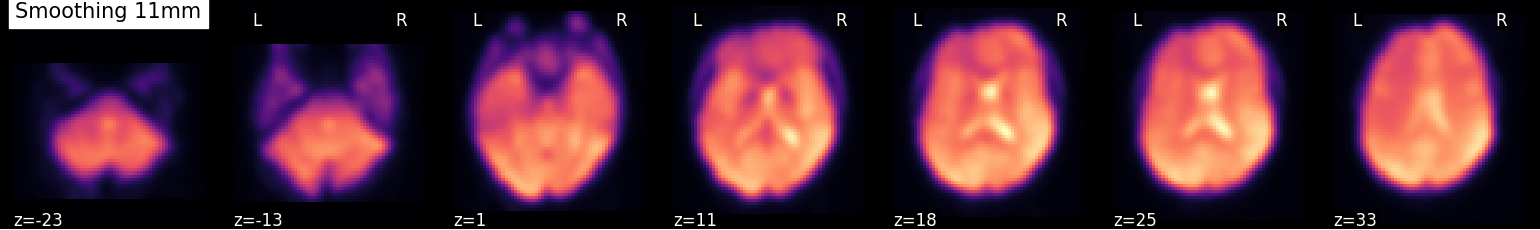

In [56]:
for fwhm in range(1, 12, 5):
    smoothed_img = nli.smooth_img(mean_img, fwhm)
    plotting.plot_epi(smoothed_img, title="Smoothing %imm" % fwhm,
                     display_mode='z', cmap='magma')

### Plotting a time course

Let's plot a time course of the central voxel in our BOLD imgage and some other random voxel.  

<IPython.core.display.Javascript object>


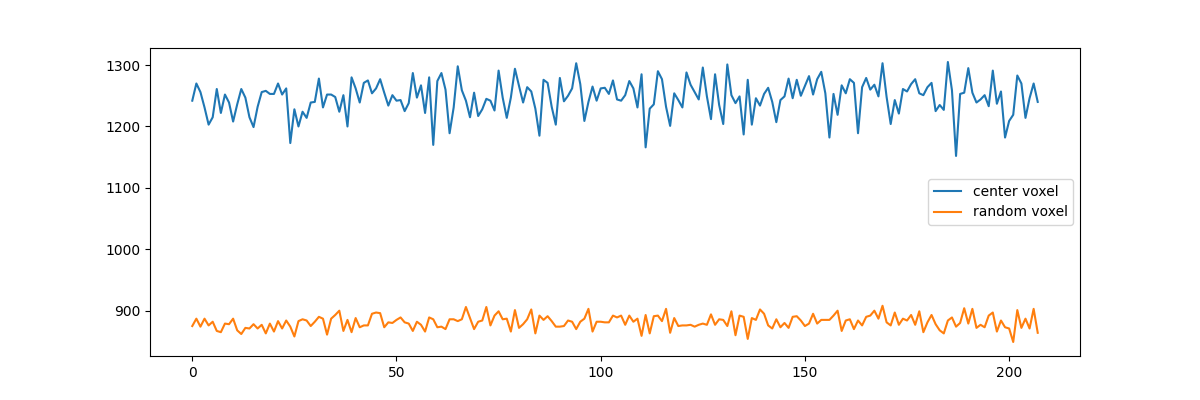

In [57]:
# get the xyz of the center 
bold_vox_center = (np.array(bold_data.shape) - 1) / 2.
x, y, z, _ = bold_vox_center

# set the plot size
plt.figure(figsize=(12, 4))

# plot the central voxel time course
plt.plot(bold_data[int(x), int(y), int(z), :])

# plot some random voxel time course
plt.plot(bold_data[28, 45, 15, :])

# add legends to the plot
plt.legend(['center voxel', 'random voxel']);

### Masking an image

You can consider your images just a special kind of a number array. And you can do any nuber operations on the images. 

For example, let's take our BOLD functional image, 
1. create the mean image of it
2. threshold it to only keep the voxels that have a value that is higher than 95% of all voxels. Of this thresholded image, we only 
3. keep those regions that are bigger than 1000mm^3. And finally, we 
4. binarize those regions to create a mask image.


/home/da05/.conda/envs/cognestic23/lib/python3.10/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



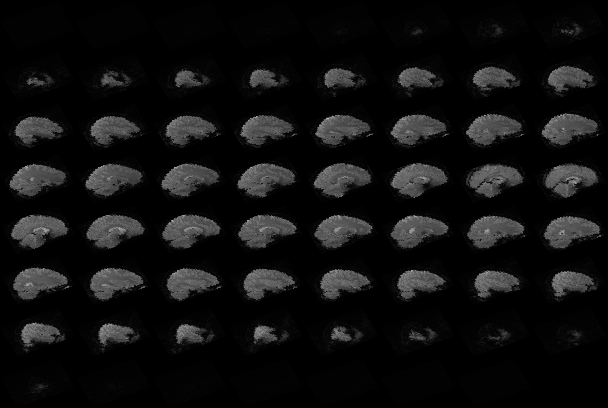
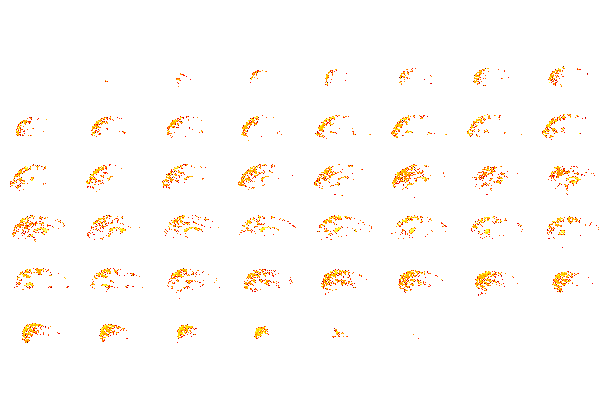

In [58]:
#1 create the mean image
mean_img = nli.mean_img(bold_img)

#2  keep voxels that have a value that is higher than 95% of all voxels
thr = nli.threshold_img(mean_img, threshold='95%')

#let's see how the thresholded image look compared to the original mean image
plotting.view_img(thr, bg_img=mean_img)

In [59]:
#3 only keep those voxels that are in regions/clusters that are bigger than 1000mm^3.

# get a size of 1 voxel in mm^3
print('pixdim:', thr.header['pixdim'])
voxel_size = np.prod(thr.header['pixdim'][1:4])  
print('one voxel size in mm^3:', voxel_size)

pixdim: [-1.   3.   3.   3.9  1.   1.   1.   1. ]
one voxel size in mm^3: 35.100002


In [60]:
# Create the mask that only keeps those big clusters.
from nilearn.regions import connected_regions

cluster = connected_regions(thr, min_region_size=1000. / voxel_size, smoothing_fwhm=1)[0]

#4 And finally, let's binarize this cluster image to create a mask.
mask = nli.math_img('np.mean(img,axis=3) > 0', img=cluster)

<IPython.core.display.Javascript object>


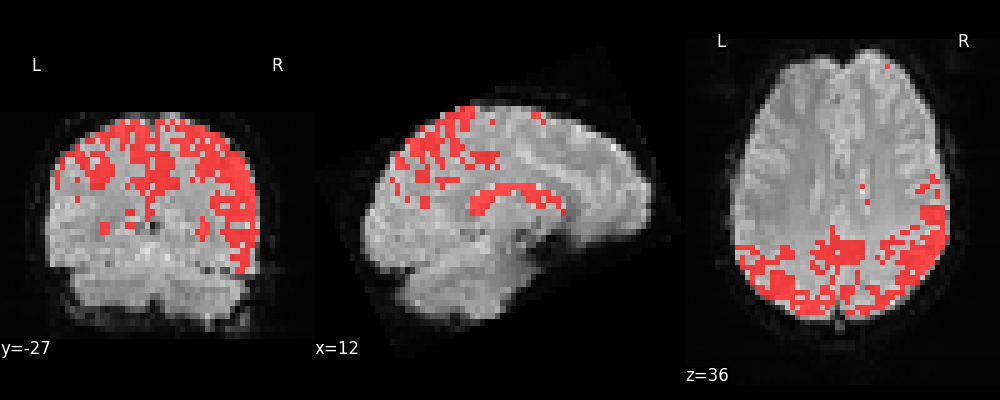

In [61]:
# let's see how our mask looks on the mean BOLD image

from nilearn.plotting import plot_roi
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(10, 4))

plotting.plot_roi(mask, 
                  bg_img=mean_img, 
                  draw_cross=False, 
                  dim=-.5, 
                  cmap=ListedColormap(["red"]), 
                  figure=fig)